In [ ]:
import os
import pandas as pd

try:
    df = pd.read_csv('kiranaRO_train.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'kiranaRO_train.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

file_size = os.path.getsize("/content/kiranaRO_train.csv")
print(f" File size: {file_size} bytes")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,573745,22138,BAKING SET 9 PIECE RETROSPOT,6,2011-11-01 08:53:00,4.95,17419.0,United Kingdom
1,562670,22791,T-LIGHT GLASS FLUTED ANTIQUE,12,2011-08-08 13:42:00,1.25,14911.0,EIRE
2,541604,51014L,"FEATHER PEN,LIGHT PINK",24,2011-01-19 17:23:00,0.85,14572.0,United Kingdom
3,551855,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-05-04 15:08:00,11.95,12836.0,United Kingdom
4,561474,22384,LUNCH BAG PINK POLKADOT,100,2011-07-27 13:18:00,1.45,14680.0,United Kingdom


(433527, 8)
📦 File size: 38432353 bytes


In [ ]:
# Handle Missing Values
print("Missing values before handling:")
print(df.isnull().sum())

# Impute missing 'CustomerID' with the mode
df['CustomerID'] = df['CustomerID'].fillna(df['CustomerID'].mode()[0])

# Impute missing 'Description' with a placeholder
df['Description'] = df['Description'].fillna("Missing Description")

print("\nMissing values after handling:")
print(df.isnull().sum())

# Data Type Conversion
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)

# Outlier Detection and Treatment (example using IQR for 'Quantity')
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Winsorize outliers in 'Quantity'
df['Quantity'] = df['Quantity'].clip(lower=lower_bound, upper=upper_bound)

Missing values before handling:
InvoiceNo           0
StockCode           0
Description      1162
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     107957
Country             0
dtype: int64

Missing values after handling:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
# Duplicate Removal
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")
df.drop_duplicates(inplace=True)

print(f"Number of rows after removing duplicates: {len(df)}")
display(df.head())

df.to_csv("cleaned_data.csv", index=False)
print(" Cleaned data saved as 'cleaned_data.csv'")


Number of duplicate rows: 3476
Number of rows after removing duplicates: 430051


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,573745,22138,BAKING SET 9 PIECE RETROSPOT,6.0,2011-11-01 08:53:00,4.95,17419,United Kingdom
1,562670,22791,T-LIGHT GLASS FLUTED ANTIQUE,12.0,2011-08-08 13:42:00,1.25,14911,EIRE
2,541604,51014L,"FEATHER PEN,LIGHT PINK",23.5,2011-01-19 17:23:00,0.85,14572,United Kingdom
3,551855,22622,BOX OF VINTAGE ALPHABET BLOCKS,2.0,2011-05-04 15:08:00,11.95,12836,United Kingdom
4,561474,22384,LUNCH BAG PINK POLKADOT,23.5,2011-07-27 13:18:00,1.45,14680,United Kingdom


✅ Cleaned data saved as 'cleaned_data.csv'


In [ ]:
# Descriptive Statistics
numerical_features = ['Quantity', 'UnitPrice']
print("Descriptive Statistics:")
print(df[numerical_features].describe())

# Analyze distributions of 'Quantity' and 'UnitPrice'
print("\nDistribution of Quantity:")
print(df['Quantity'].value_counts(normalize=True).head(10)) # Top 10 most frequent values
print("\nDistribution of UnitPrice:")
print(df['UnitPrice'].value_counts(normalize=True).head(10)) # Top 10 most frequent values


# Categorical Feature Analysis
categorical_features = ['Country', 'Description', 'StockCode']
print("\nFrequency of top 10 Descriptions:")
print(df['Description'].value_counts(normalize=True).head(10))
print("\nFrequency of top 10 StockCodes:")
print(df['StockCode'].value_counts(normalize=True).head(10))
print("\nFrequency of Countries:")
print(df['Country'].value_counts(normalize=True))

Descriptive Statistics:
            Quantity      UnitPrice
count  430051.000000  430051.000000
mean        6.528058       4.664479
std         7.311241      99.838809
min       -12.500000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max        23.500000   38970.000000

Distribution of Quantity:
Quantity
1.0     0.269496
2.0     0.151633
12.0    0.113421
23.5    0.105281
6.0     0.075549
4.0     0.071373
3.0     0.068738
10.0    0.041525
8.0     0.024355
5.0     0.021902
Name: proportion, dtype: float64

Distribution of UnitPrice:
UnitPrice
1.25    0.092963
1.65    0.070038
0.85    0.052352
2.95    0.050822
0.42    0.045339
4.95    0.035175
3.75    0.034210
2.10    0.032282
2.46    0.031824
2.08    0.031550
Name: proportion, dtype: float64

Frequency of top 10 Descriptions:
Description
WHITE HANGING HEART T-LIGHT HOLDER    0.004381
REGENCY CAKESTAND 3 TIER              0.004104
JUMBO BAG RED RETROSPOT        

In [ ]:
# Relationship Analysis: Quantity vs UnitPrice
print("\nCorrelation between Quantity and UnitPrice:")
print(df[['Quantity', 'UnitPrice']].corr())

# CustomerID and purchase frequency or total spending
print("\nPurchase Frequency per Customer:")
print(df['CustomerID'].value_counts().head(10))
print("\nTotal Spending per Customer:")
print(df.groupby('CustomerID')['UnitPrice'].sum().head(10))

# Inconsistencies (example: check for negative UnitPrice)
print("\nNumber of rows with negative UnitPrice:", len(df[df['UnitPrice'] < 0]))
print("\nNumber of rows with negative Quantity:", len(df[df['Quantity'] < 0]))


Correlation between Quantity and UnitPrice:
           Quantity  UnitPrice
Quantity   1.000000  -0.023351
UnitPrice -0.023351   1.000000

Purchase Frequency per Customer:
CustomerID
17841    114212
14911      4651
14096      4099
12748      3546
14606      2209
15311      2023
14646      1642
13089      1479
13263      1376
14298      1339
Name: count, dtype: int64

Total Spending per Customer:
CustomerID
12346       1.04
12347     399.01
12348     136.26
12349     233.10
12350      60.25
12352    1924.71
12353       4.40
12354     228.92
12355      47.50
12356     167.02
Name: UnitPrice, dtype: float64

Number of rows with negative UnitPrice: 1

Number of rows with negative Quantity: 8441


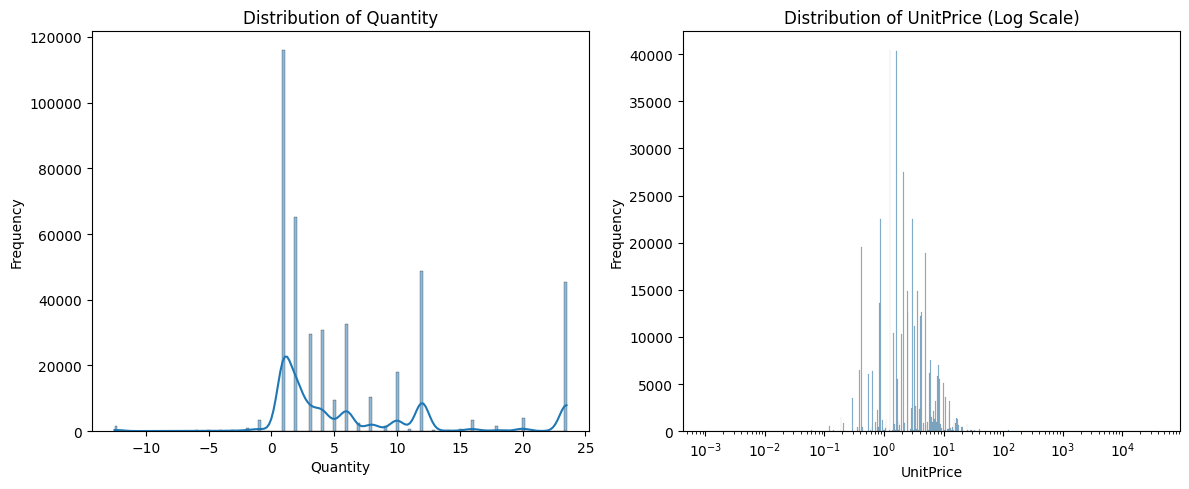

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['UnitPrice'], kde=True, log_scale=True)  # Use log scale for UnitPrice
plt.title('Distribution of UnitPrice (Log Scale)')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


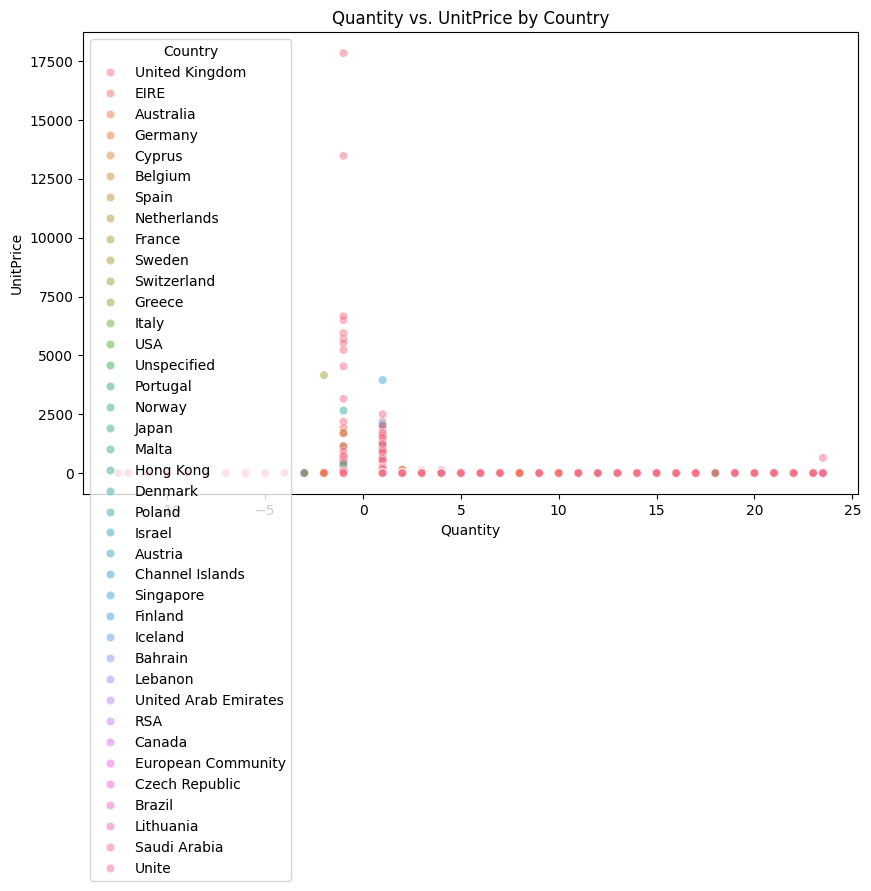

In [ ]:
# 2. Relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Country', data=df, alpha=0.5)
plt.title('Quantity vs. UnitPrice by Country')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

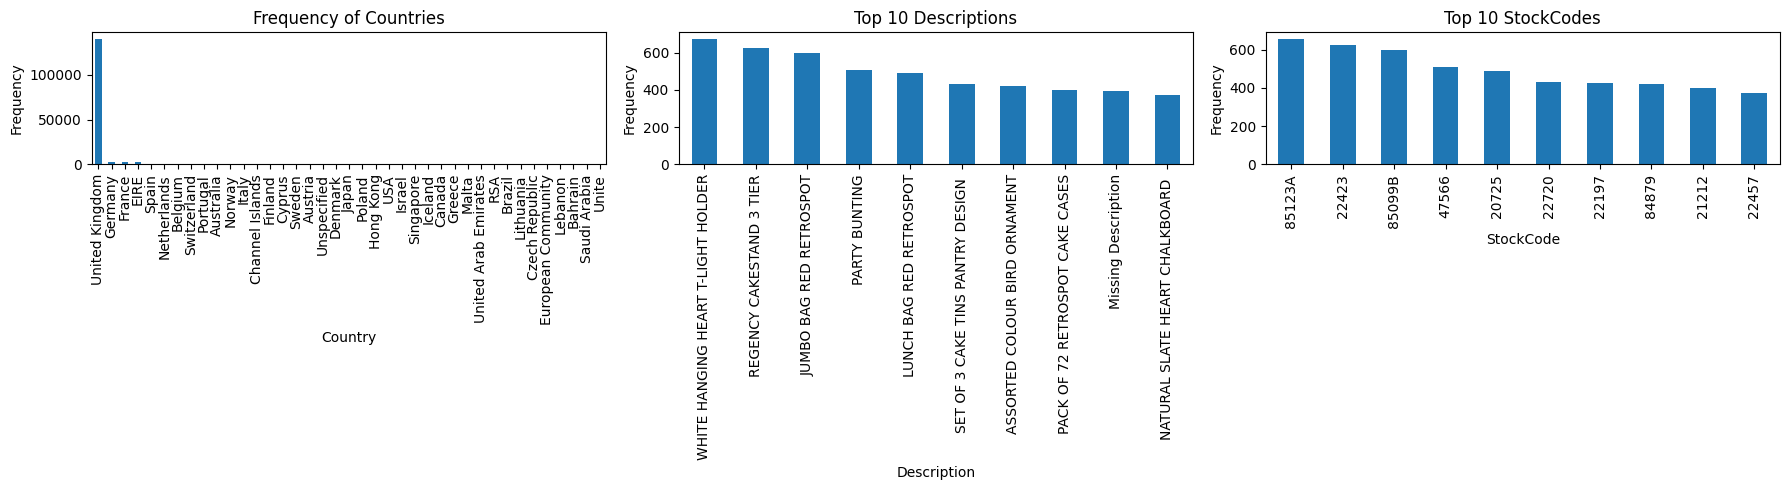

In [ ]:
# 3. Categorical Analysis
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
df['Country'].value_counts().plot(kind='bar')
plt.title('Frequency of Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
df['Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Descriptions')
plt.xlabel('Description')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
df['StockCode'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 StockCodes')
plt.xlabel('StockCode')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


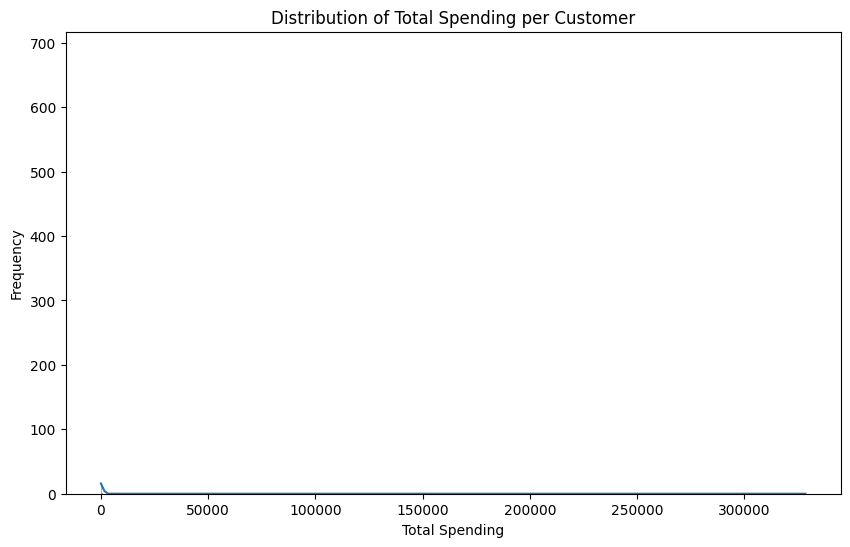

In [ ]:
# 4. Customer Analysis (example: total spending per customer)
plt.figure(figsize=(10, 6))
customer_spending = df.groupby('CustomerID')['UnitPrice'].sum()
sns.histplot(customer_spending, kde=True)
plt.title('Distribution of Total Spending per Customer')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()


<ipython-input-11-e23476d9156f>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_by_month = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['UnitPrice'].sum()


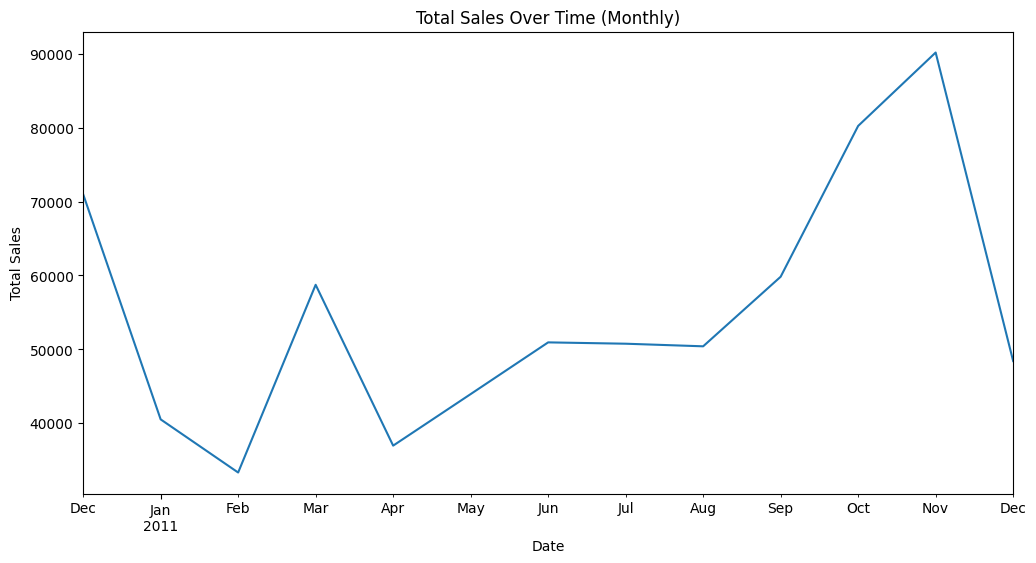

In [ ]:

# 5. Time Series Analysis (example: total sales over time)
plt.figure(figsize=(12, 6))
sales_by_month = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['UnitPrice'].sum()
sales_by_month.plot(kind='line')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

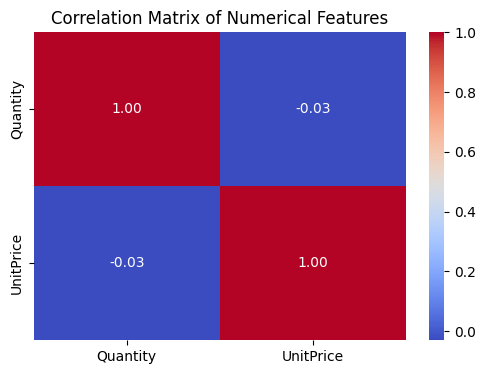

T-statistic: -2.84, P-value: 0.004


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Correlation Analysis
correlation_matrix = df[['Quantity', 'UnitPrice']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Hypothesis Testing (example: UnitPrice difference between UK and other countries)
uk_prices = df[df['Country'] == 'United Kingdom']['UnitPrice']
other_countries_prices = df[df['Country'] != 'United Kingdom']['UnitPrice']
t_statistic, p_value = ttest_ind(uk_prices, other_countries_prices)
print(f"T-statistic: {t_statistic:.2f}, P-value: {p_value:.3f}")

In [ ]:
# Customer Segmentation (example: RFM analysis)
# Calculate Recency, Frequency, Monetary Value
import datetime as dt
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                        'InvoiceNo': 'count',
                                        'TotalSum': 'sum'})
rfm.rename(columns={'InvoiceDate': 'Recency',
                        'InvoiceNo': 'Frequency',
                        'TotalSum': 'MonetaryValue'}, inplace=True)


In [ ]:
# Customer Segmentation based on quantiles
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

rfm['R'] = rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm['F'] = rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm['M'] = rfm['MonetaryValue'].apply(FMScore, args=('MonetaryValue',quantiles,))
rfm['RFMGroup'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)


<ipython-input-15-ab59d76768fb>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalSum'].sum()


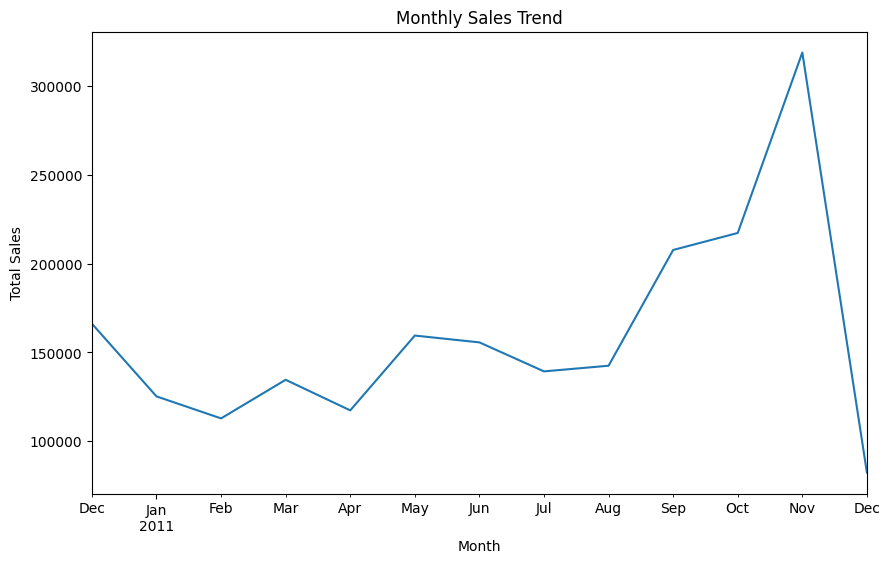

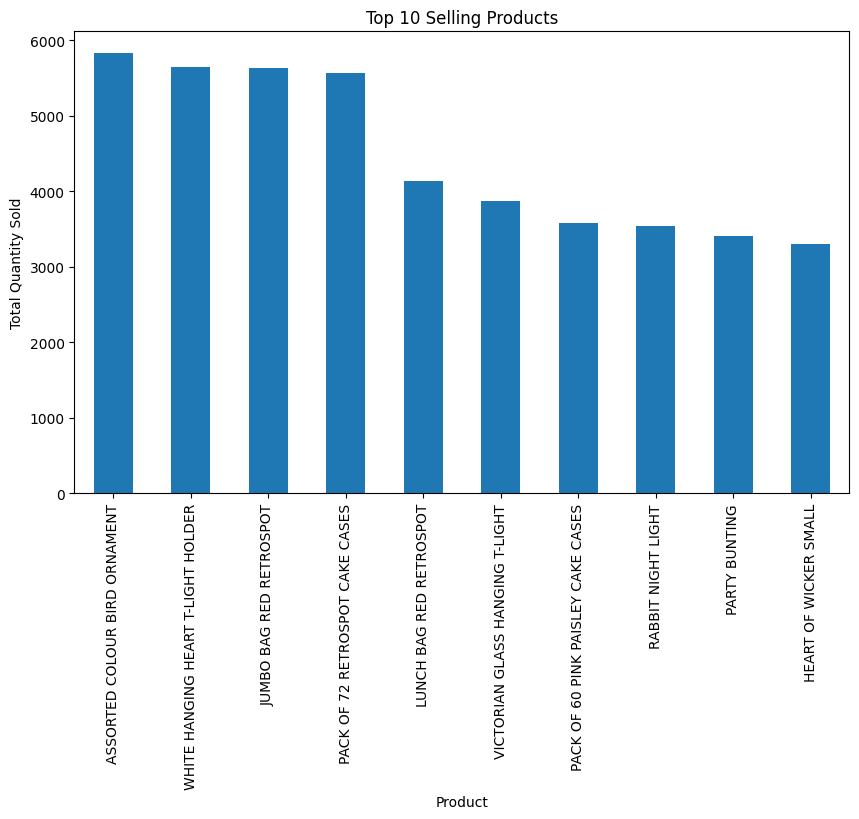

Summary of Findings:

Correlation Analysis: A heatmap visualizes the correlation between numerical features.
Hypothesis Testing: A t-test compares average unit prices between the UK and other countries.
Customer Segmentation: RFM analysis segments customers based on recency, frequency, and monetary value.
Time Series Analysis: A line plot shows the monthly sales trend.
Product Analysis: A bar chart displays the top 10 selling products.


In [ ]:
# Time Series Analysis (example: monthly sales)
monthly_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalSum'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Product Analysis (example: top 10 selling products)
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.show()

print("Summary of Findings:\n")
print("Correlation Analysis: A heatmap visualizes the correlation between numerical features.")
print("Hypothesis Testing: A t-test compares average unit prices between the UK and other countries.")
print("Customer Segmentation: RFM analysis segments customers based on recency, frequency, and monetary value.")
print("Time Series Analysis: A line plot shows the monthly sales trend.")
print("Product Analysis: A bar chart displays the top 10 selling products.")


Top Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []
